# Exploring College Majors And Graduates

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The dataset used here has been cleaned and was taken from https://github.com/fivethirtyeight/data/tree/master/college-majors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

Analyze the structure of the dataset.

In [2]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Let's check for and remove null values in each row.

In [3]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna(how="any", axis=0)
cleaned_data_count = len(recent_grads)
print(raw_data_count)
print(cleaned_data_count)

173
172


## Analyze Scatterplots

### Do students in more popular majors make more money?

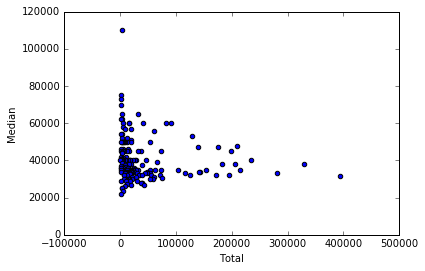

In [4]:
recent_grads.plot(x="Total", y="Median", kind="scatter")
plt.show()

Looking at the scatter plot above, we can see that as "Total" increases "Median" decreases along with it suggesting that students who enroll in more popular majors tend to make less money.

### Do students that majored in subjects that were majority female make more money?

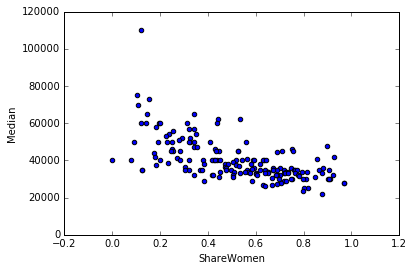

In [5]:
recent_grads.plot(x="ShareWomen", y="Median", kind="scatter")
plt.show()

When correlating between the Median income of graduates and the share of those graduates who were women, it can be suggested that predominately female majors tend to make less money than their predominately male counterparts.

### Is there any link between the number of full-time employees and median salary?

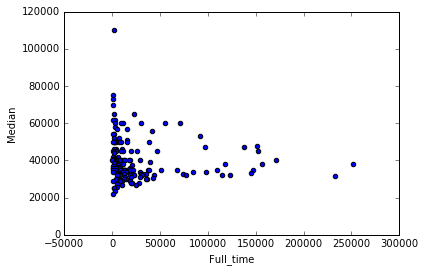

In [6]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter")
plt.show()

The only suggestion this plot makes based on the given data is that most graduates who become full time employees make anywhere from 20k to 40k in their salary.

## Analyze Histograms

### What percent of majors are predominantly male? Predominantly female?

A major is predominately female if the percentage of those enrolled is 50% (or 0.5) and above.

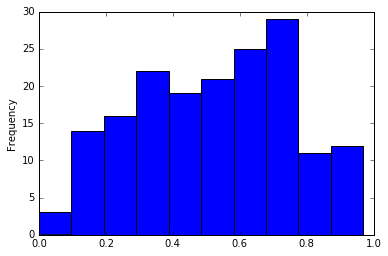

In [7]:
recent_grads["ShareWomen"].plot(kind="hist")
plt.show()

An overlook of the graph shows that most majors are predominately female, although not by much. Let's compute the percentages to be certain.

In [8]:
total_num_majors = len(recent_grads)
female_majors = recent_grads[recent_grads["ShareWomen"] >= 0.5]
male_majors = recent_grads[recent_grads["ShareWomen"] < 0.5]

diff_male = total_num_majors - len(male_majors)
diff_female = total_num_majors - len(female_majors)

predom_male = (diff_male / total_num_majors) * 100
predom_female = (diff_female / total_num_majors) * 100


print("Predominately Male Majors: " + str(round(predom_male, 2)) + "%")
print("Predominately Female Majors: " + str(round(predom_female, 2)) + "%")

Predominately Male Majors: 55.81%
Predominately Female Majors: 44.19%


Our first assumption was wrong. It turns out that most majors are actually predominately male.

### What's the most common median salary range?

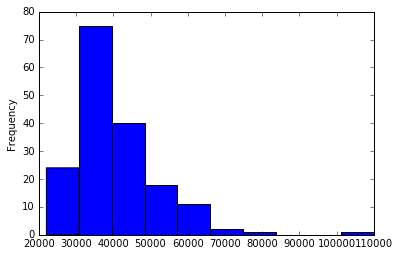

In [9]:
recent_grads["Median"].plot(kind="hist")
plt.show()

A quick look and we can see that the 30k to 40k range is the most common median salary.

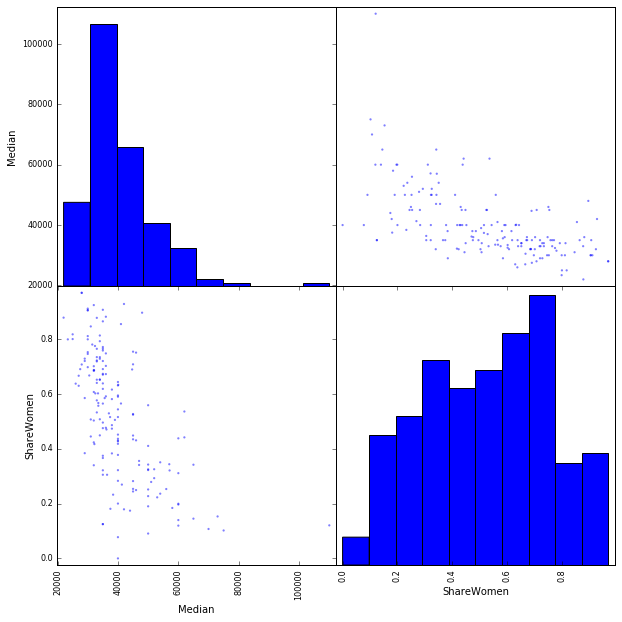

In [10]:
pd.plotting.scatter_matrix(recent_grads[['Median', 'ShareWomen']], figsize=(10,10))
plt.show()

Scatter Matrix representation of previous graphs above.

## Analyze Bar Plots

### Which majors have the highest unemployment rate? Lowest?

We'll find the top ten highest first.

In [11]:
c_recent_grads = recent_grads.copy()

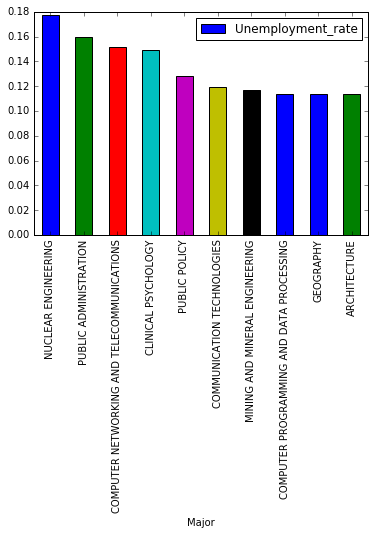

In [12]:
c_recent_grads.sort_values(["Unemployment_rate"], ascending=False, inplace=True)
c_recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

Now we'll find the top ten lowest.

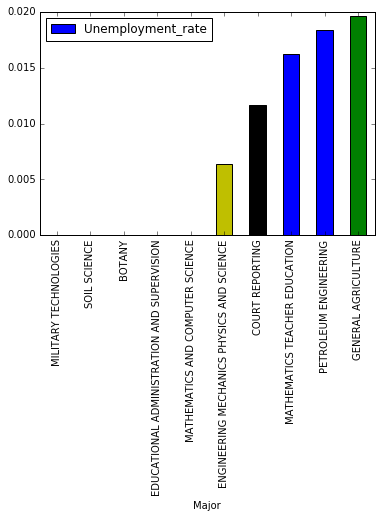

In [13]:
c_recent_grads.sort_values(["Unemployment_rate"], ascending=True, inplace=True)
c_recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

Five majors have a 0 unemployment rate. It's hard to know whether this is true or if some important data has been left out. Either way, this will have to do for now.